<a href="https://colab.research.google.com/github/Oopirata/PraktikumMachineLearning/blob/main/Tugas2_Hanif_Herofa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Hanif Herofa

NIM : 24060122120015

Nama Dataset : Abalone

URL : "https://archive.ics.uci.edu/dataset/1/abalone"

**Tugas 2**

1. Lakukan clustering menggunakan dataset masing-masing (2 fitur atau lebih). Gunakan elbow method untuk menentukan nilai k optimal.

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.cluster import silhouette_score

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Definisikan nama kolom
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
         'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

# Baca dataset dengan pandas
data = pd.read_csv(url, names=names)

In [5]:
data.shape

(4177, 9)

In [6]:
data.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Whole_weight,float64
Shucked_weight,float64
Viscera_weight,float64
Shell_weight,float64
Rings,int64


In [7]:
data.head(20)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


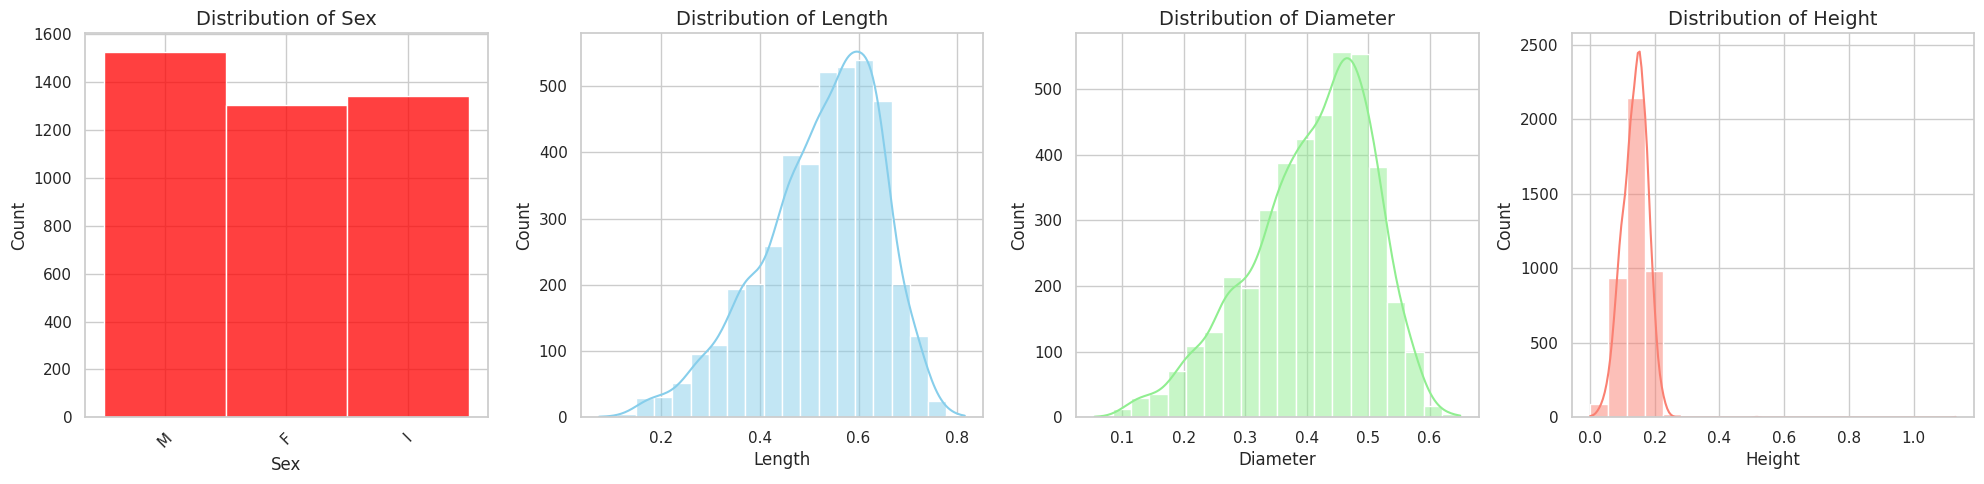

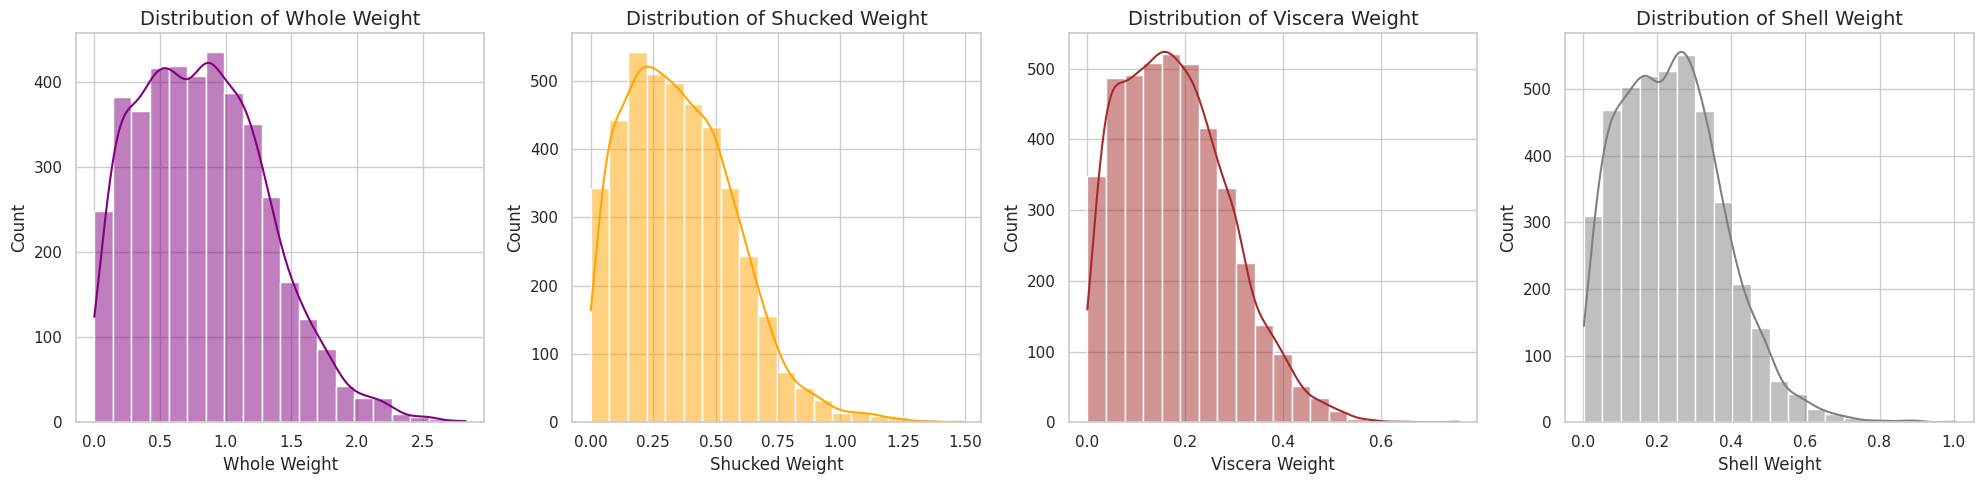

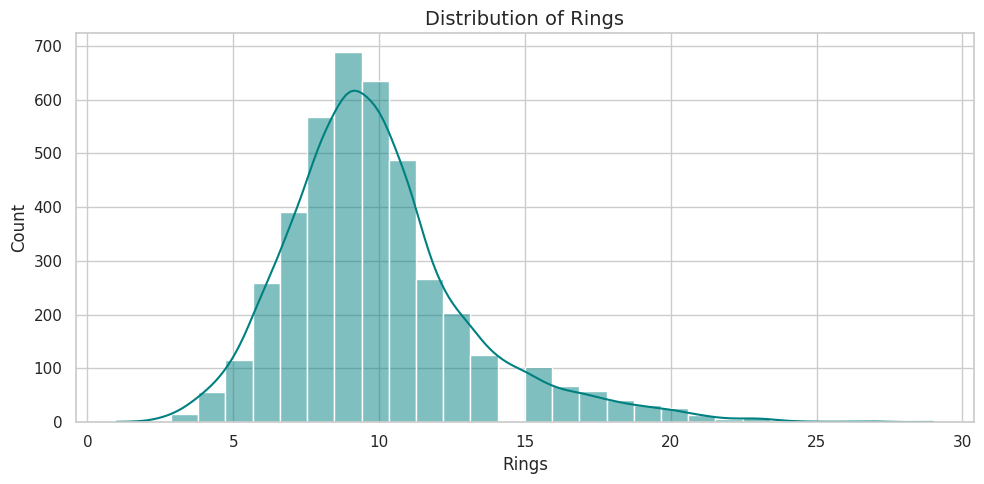


Basic Statistics of Abalone Measurements:
            Length     Diameter       Height  Whole_weight  Shucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  

In [8]:
# Set style for better aesthetics
sns.set_theme(style="whitegrid")

# Create first set of subplots for different abalone measurements
plt.figure(figsize=(20, 5))

# Plot for Sex distribution
plt.subplot(1, 4, 1)
sns.histplot(data=data['Sex'], color='red')
plt.title('Distribution of Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Plot for Length distribution
plt.subplot(1, 4, 2)
sns.histplot(data=data['Length'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Length', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Diameter distribution
plt.subplot(1, 4, 3)
sns.histplot(data=data['Diameter'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Diameter', fontsize=14)
plt.xlabel('Diameter', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Height distribution
plt.subplot(1, 4, 4)
sns.histplot(data=data['Height'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Height', fontsize=14)
plt.xlabel('Height', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Create second set of subplots for weight measurements
plt.figure(figsize=(20, 5))

# Plot for Whole weight distribution
plt.subplot(1, 4, 1)
sns.histplot(data=data['Whole_weight'], kde=True, bins=20, color='purple')
plt.title('Distribution of Whole Weight', fontsize=14)
plt.xlabel('Whole Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Shucked weight distribution
plt.subplot(1, 4, 2)
sns.histplot(data=data['Shucked_weight'], kde=True, bins=20, color='orange')
plt.title('Distribution of Shucked Weight', fontsize=14)
plt.xlabel('Shucked Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Viscera weight distribution
plt.subplot(1, 4, 3)
sns.histplot(data=data['Viscera_weight'], kde=True, bins=20, color='brown')
plt.title('Distribution of Viscera Weight', fontsize=14)
plt.xlabel('Viscera Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Plot for Shell weight distribution
plt.subplot(1, 4, 4)
sns.histplot(data=data['Shell_weight'], kde=True, bins=20, color='gray')
plt.title('Distribution of Shell Weight', fontsize=14)
plt.xlabel('Shell Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Create a separate plot for Rings distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=data['Rings'], kde=True, bins=30, color='teal')
plt.title('Distribution of Rings', fontsize=14)
plt.xlabel('Rings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics of Abalone Measurements:")
numeric_columns = ['Length', 'Diameter', 'Height', 'Whole_weight',
                  'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
print(data[numeric_columns].describe())

# Print Sex distribution
print("\nSex Distribution:")
print(data['Sex'].value_counts())

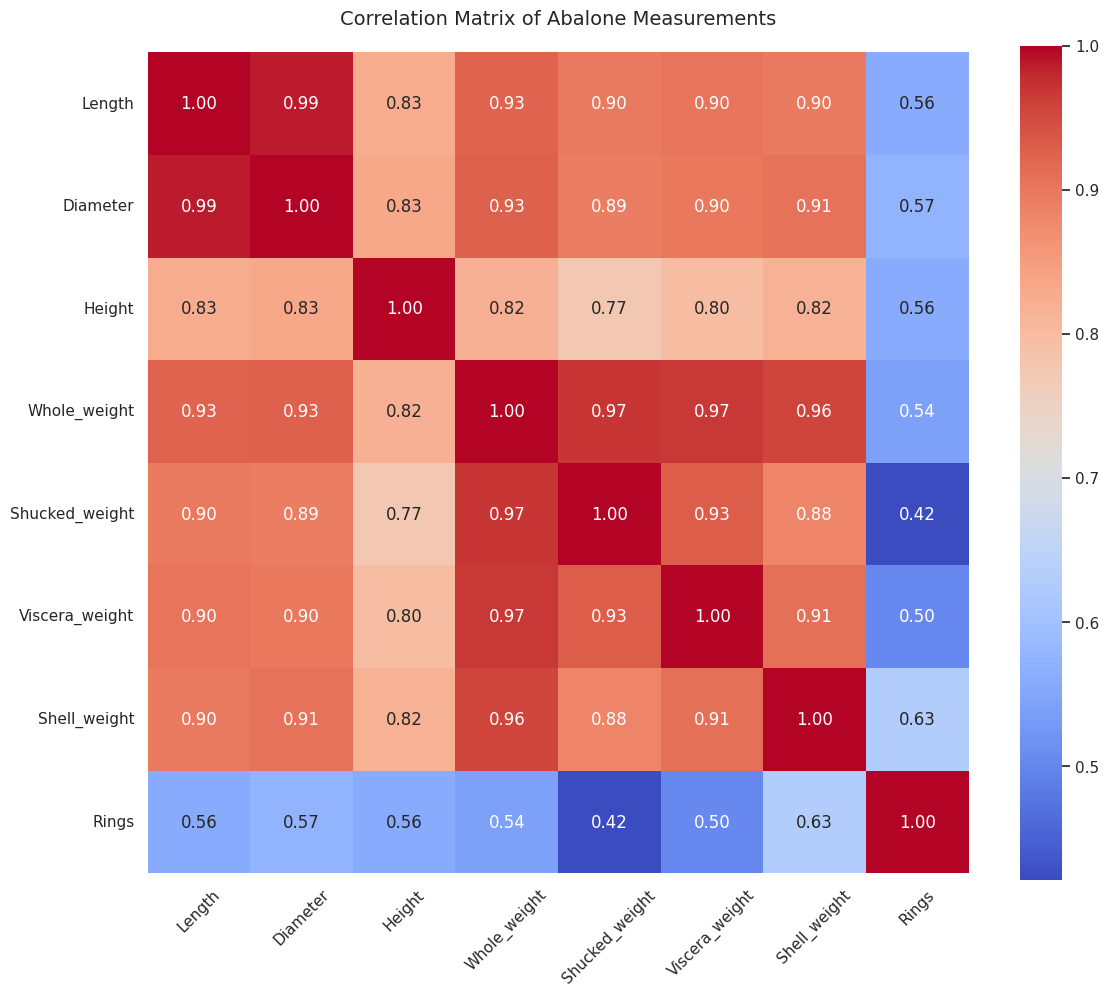


Interpretasi Korelasi Kuat (>0.5 atau <-0.5):
Length vs Diameter: 0.99
Length vs Height: 0.83
Length vs Whole_weight: 0.93
Length vs Shucked_weight: 0.90
Length vs Viscera_weight: 0.90
Length vs Shell_weight: 0.90
Length vs Rings: 0.56
Diameter vs Height: 0.83
Diameter vs Whole_weight: 0.93
Diameter vs Shucked_weight: 0.89
Diameter vs Viscera_weight: 0.90
Diameter vs Shell_weight: 0.91
Diameter vs Rings: 0.57
Height vs Whole_weight: 0.82
Height vs Shucked_weight: 0.77
Height vs Viscera_weight: 0.80
Height vs Shell_weight: 0.82
Height vs Rings: 0.56
Whole_weight vs Shucked_weight: 0.97
Whole_weight vs Viscera_weight: 0.97
Whole_weight vs Shell_weight: 0.96
Whole_weight vs Rings: 0.54
Shucked_weight vs Viscera_weight: 0.93
Shucked_weight vs Shell_weight: 0.88
Viscera_weight vs Shell_weight: 0.91
Viscera_weight vs Rings: 0.50
Shell_weight vs Rings: 0.63


In [9]:
# Memilih kolom numerik untuk analisis korelasi
numeric_columns = ['Length', 'Diameter', 'Height', 'Whole_weight',
                  'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
data_for_corr = data[numeric_columns]

# Menghitung matriks korelasi
corr = data_for_corr.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Abalone Measurements', fontsize=14, pad=20)

# Rotate tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print interpretasi korelasi
print("\nInterpretasi Korelasi Kuat (>0.5 atau <-0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > 0.5:
            print(f"{corr.columns[i]} vs {corr.columns[j]}: {corr.iloc[i,j]:.2f}")

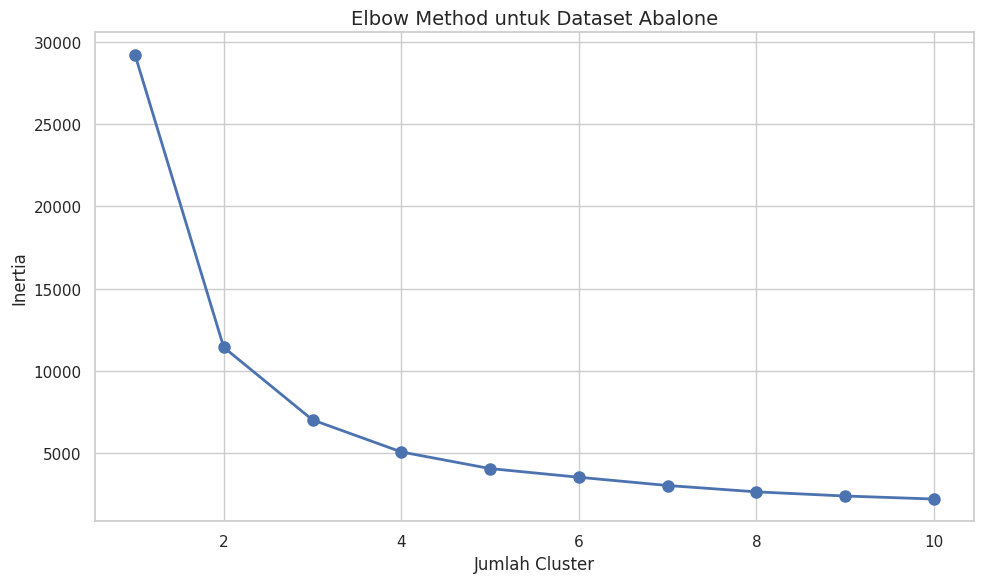


Berdasarkan analisis elbow method, jumlah cluster optimal adalah sekitar 6 cluster

Statistik untuk setiap cluster:

Cluster 0:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
mean    0.62      0.49    0.17          1.23            0.53            0.27   
std     0.03      0.02    0.02          0.14            0.09            0.04   

      Shell_weight  
mean          0.35  
std           0.06  

Cluster 1:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
mean    0.55      0.43    0.15          0.84            0.36            0.18   
std     0.03      0.03    0.02          0.12            0.07            0.03   

      Shell_weight  
mean          0.25  
std           0.04  

Cluster 2:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
mean    0.32      0.24    0.08          0.17            0.07            0.04   
std     0.06      0.05    0.02          0.08            0.04            0.02   

In [10]:
# Memilih fitur numerik untuk clustering
features = ['Length', 'Diameter', 'Height', 'Whole_weight',
            'Shucked_weight', 'Viscera_weight', 'Shell_weight']
X1 = data[features].values

# Standarisasi fitur
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

# Menyiapkan list untuk menyimpan nilai inertia untuk setiap jumlah cluster
inertia = []

# Loop untuk menguji jumlah cluster dari 1 hingga 10
for n in range(1, 11):
    # Membuat objek KMeans dengan jumlah cluster = n
    algorithm = KMeans(n_clusters=n,          # Menentukan jumlah cluster (n)
                      init='k-means++',       # Menggunakan metode k-means++ untuk inisialisasi pusat cluster
                      n_init=10,              # Melakukan inisialisasi sebanyak 10 kali dan memilih yang terbaik
                      max_iter=300,           # Membatasi jumlah iterasi maksimal sampai 300 kali
                      tol=0.0001,             # Toleransi untuk konvergensi
                      random_state=111        # Menetapkan random seed
                     )

    # Melatih model KMeans dengan data X1
    algorithm.fit(X1)

    # Menyimpan nilai inertia yang dihasilkan oleh KMeans untuk jumlah cluster ini
    inertia.append(algorithm.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method untuk Dataset Abalone', fontsize=14)
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mencari elbow point
inertia_differences = np.diff(inertia)
second_differences = np.diff(inertia_differences)
elbow_point = np.argmin(second_differences) + 2

print(f"\nBerdasarkan analisis elbow method, jumlah cluster optimal adalah sekitar {elbow_point} cluster")

# Menerapkan K-Means dengan jumlah cluster optimal
optimal_kmeans = KMeans(n_clusters=elbow_point,
                       init='k-means++',
                       n_init=10,
                       max_iter=300,
                       random_state=111)

# Fit model dan mendapatkan labels
cluster_labels = optimal_kmeans.fit_predict(X1)

# Menambahkan labels ke dataset asli
data['Cluster'] = cluster_labels

# Mencetak statistik untuk setiap cluster
print("\nStatistik untuk setiap cluster:")
for i in range(elbow_point):
    print(f"\nCluster {i}:")
    print(data[data['Cluster'] == i][features].describe().round(2).loc[['mean', 'std']])

2. ⁠Lakukan evaluasi hasil clustering menggunakan inertia dan silhouette coefficient

**Inertia**

In [14]:
# Melakukan iterasi untuk berbagai nilai k
print("Hasil perhitungan SSE untuk setiap nilai k:")
print("----------------------------------------")
for k in range(1, 11):
    # Menentukan jumlah cluster
    kmeans = KMeans(n_clusters=k,
                    random_state=1,
                    n_init=10)  # Menambahkan n_init untuk menghindari warning

    # Fitting input data
    kmeans = kmeans.fit(X1)

    # Mendapatkan cluster labels
    labels = kmeans.predict(X1)

    # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
    inertia = kmeans.inertia_

    print(f"k: {k:2d} | SSE: {inertia:.2f}")
    print("-" * 30)

Hasil perhitungan SSE untuk setiap nilai k:
----------------------------------------
k:  1 | SSE: 29239.00
------------------------------
k:  2 | SSE: 11436.37
------------------------------
k:  3 | SSE: 7024.26
------------------------------
k:  4 | SSE: 5075.63
------------------------------
k:  5 | SSE: 4063.63
------------------------------
k:  6 | SSE: 3561.23
------------------------------
k:  7 | SSE: 3033.01
------------------------------
k:  8 | SSE: 2647.60
------------------------------
k:  9 | SSE: 2395.19
------------------------------
k: 10 | SSE: 2212.13
------------------------------


Shillouette


Hasil Evaluasi Silhouette Score:
--------------------------------
 n_clusters  silhouette_score
          2          0.513356
          3          0.442522
          4          0.415498
          5          0.386915
          6          0.387666
          7          0.360159
          8          0.339183
          9          0.317738
         10          0.296237

Jumlah cluster optimal: 2
Silhouette score tertinggi: 0.5134


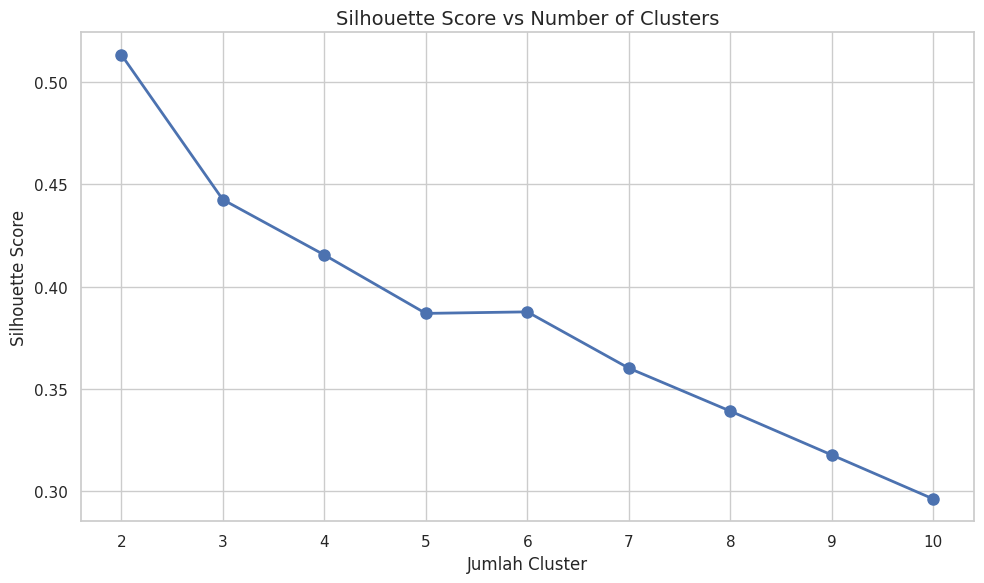


Statistik untuk setiap cluster dengan jumlah cluster optimal:

Cluster 0:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
mean   0.613     0.482   0.167         1.197            0.52           0.261   
std    0.054     0.045   0.032         0.347            0.17           0.081   

      Shell_weight  
mean         0.341  
std          0.102  

Cluster 1:
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
mean   0.421     0.323   0.108         0.404           0.174           0.088   
std    0.090     0.073   0.027         0.205           0.093           0.047   

      Shell_weight  
mean         0.121  
std          0.062  


In [15]:
# Menyiapkan list untuk menyimpan silhouette scores
silhouette_scores = []

# Loop untuk berbagai jumlah cluster
for n_clusters in range(2, 11):
    # Membuat dan melatih model KMeans
    kmeans = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    n_init=10,
                    max_iter=300,
                    tol=0.0001,
                    random_state=111)
    cluster_labels = kmeans.fit_predict(X1)

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Membuat DataFrame evaluasi
evaluation_df = pd.DataFrame({
    'n_clusters': range(2, 11),
    'silhouette_score': silhouette_scores
})

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Silhouette Score:")
print("--------------------------------")
print(evaluation_df.to_string(index=False))

# Mencari jumlah cluster terbaik berdasarkan silhouette score tertinggi
best_k = evaluation_df.loc[evaluation_df['silhouette_score'].idxmax(), 'n_clusters']
best_score = evaluation_df['silhouette_score'].max()

print(f"\nJumlah cluster optimal: {best_k}")
print(f"Silhouette score tertinggi: {best_score:.4f}")

# Visualisasi silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(evaluation_df['n_clusters'], evaluation_df['silhouette_score'],
         marker='o', linewidth=2, markersize=8)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Menerapkan clustering dengan jumlah cluster optimal
optimal_kmeans = KMeans(n_clusters=best_k,
                       init='k-means++',
                       n_init=10,
                       max_iter=300,
                       random_state=111)
optimal_labels = optimal_kmeans.fit_predict(X1)

# Menambahkan hasil clustering ke dataset
data['Cluster'] = optimal_labels

# Menampilkan statistik untuk setiap cluster
print("\nStatistik untuk setiap cluster dengan jumlah cluster optimal:")
for i in range(best_k):
    print(f"\nCluster {i}:")
    print(data[data['Cluster'] == i][features].describe().round(3).loc[['mean', 'std']])